# 6. Преобразование признаков. Нормализация. Стандартизация

### НОРМАЛИЗАЦИЯ

In [1]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)
df.head()

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664


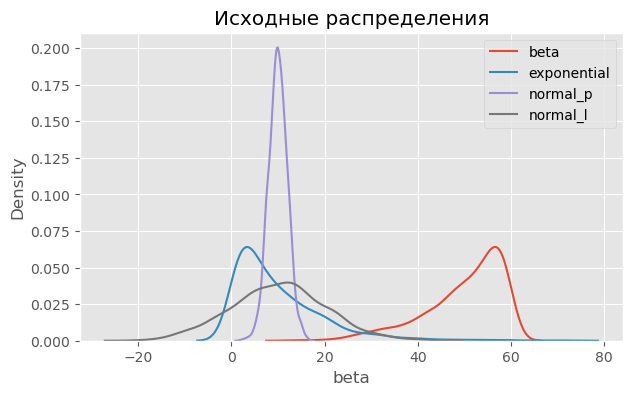

In [2]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 4))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend();

In [3]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


##### MINMAXSCALER

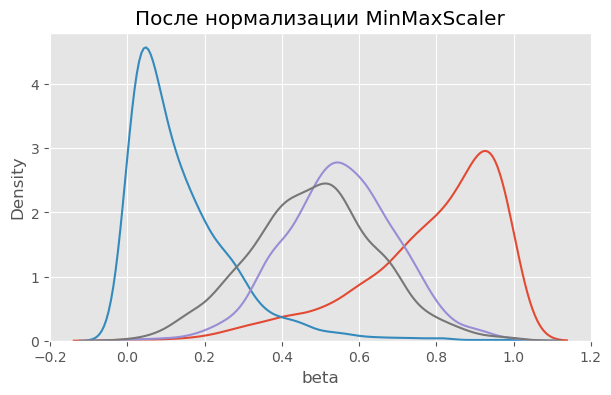

In [4]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 4))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1);

In [5]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


##### ROBUSTSCALER

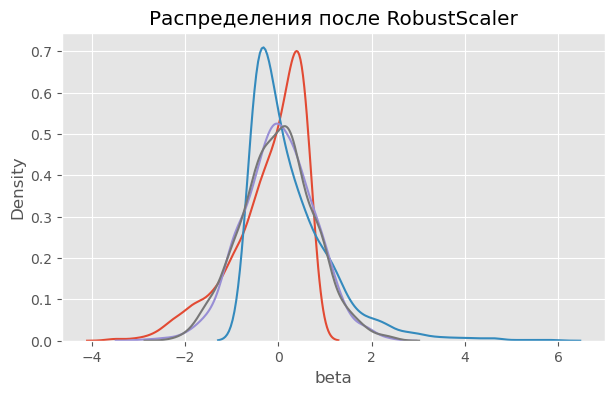

In [6]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 4))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1);

In [7]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


### СТАНДАРТИЗАЦИЯ 

##### STANDARDSCALER

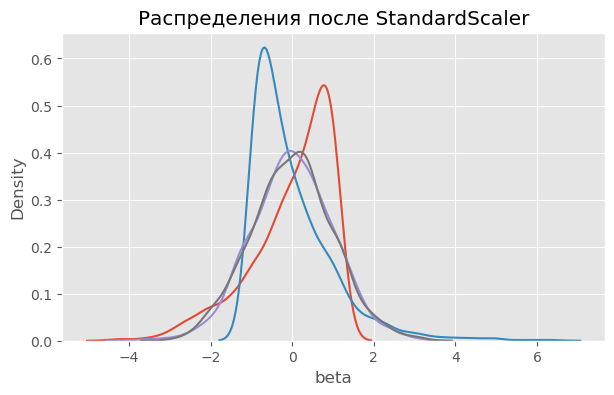

In [8]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 4))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1);

In [9]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.206147e-16,-4.618528e-17,8.013035e-16,-1.704192e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


##### Tasks

In [10]:
data = pd.read_csv('data/wine_cleared.csv')

r_scaler = preprocessing.RobustScaler()
data['price'] = r_scaler.fit_transform(data['price'].reset_index())[:,1]
round(data['price'].sum())

43501

In [11]:
data = pd.read_csv('data/wine_cleared.csv')

s_scaler = preprocessing.StandardScaler()
data['price'] = s_scaler.fit_transform(data['price'].reset_index())[:,1]
round(data['price'][129968], 2)

-0.14

# 7. Отбор признаков. Мультиколлинеарность

In [12]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

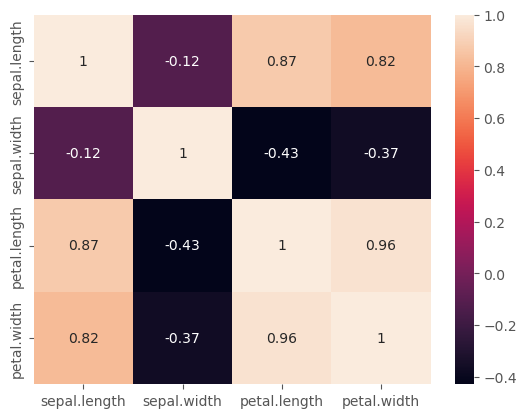

In [13]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [14]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)

# 8. Проверка знаний

In [62]:
heart = pd.read_csv('data/heart.csv')

In [63]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

In [64]:
# Для каждого значения возраста в data_heart создаем интервал, которому он принадлежит.
# Граници интервалов задаем через bins:
age_intervals = pd.cut(heart.age, bins=[0, 20, 30, 40, 50, 60, np.inf])

# Создаем словари, задающие среднее значение верхнего давления.
# Ключ словаря: индекс интервала, значение: среднее значение давления
trestbps_man = {0: 123, 1: 126, 2:129, 3:135, 4:142, 5:142}
trestbps_woman = {0: 116, 1: 120, 2:127, 3:137, 4:144, 5:169}

# создаем столбец с именем 'trestbps_mean' и заполняем его каким-нибудь значением:
heart['trestbps_mean'] = 0

# получаем индекс интервала возраста и используем его как ключ для словаря с давлением,
# из которого получаем нужное значение:
heart.loc[heart.sex == 1, 'trestbps_mean'] = age_intervals.cat.codes.map(trestbps_man)
heart.loc[heart.sex == 0, 'trestbps_mean'] = age_intervals.cat.codes.map(trestbps_woman)
heart.iloc[300,-1]

142

In [65]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
heart_encoder = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, heart_encoder], axis=1)
heart.shape

(303, 35)

In [66]:
col_names = list(heart.columns)

r_scaler = preprocessing.RobustScaler()
heart_r = r_scaler.fit_transform(heart)
heart_r = pd.DataFrame(heart_r, columns=col_names)
heart_r['chol'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

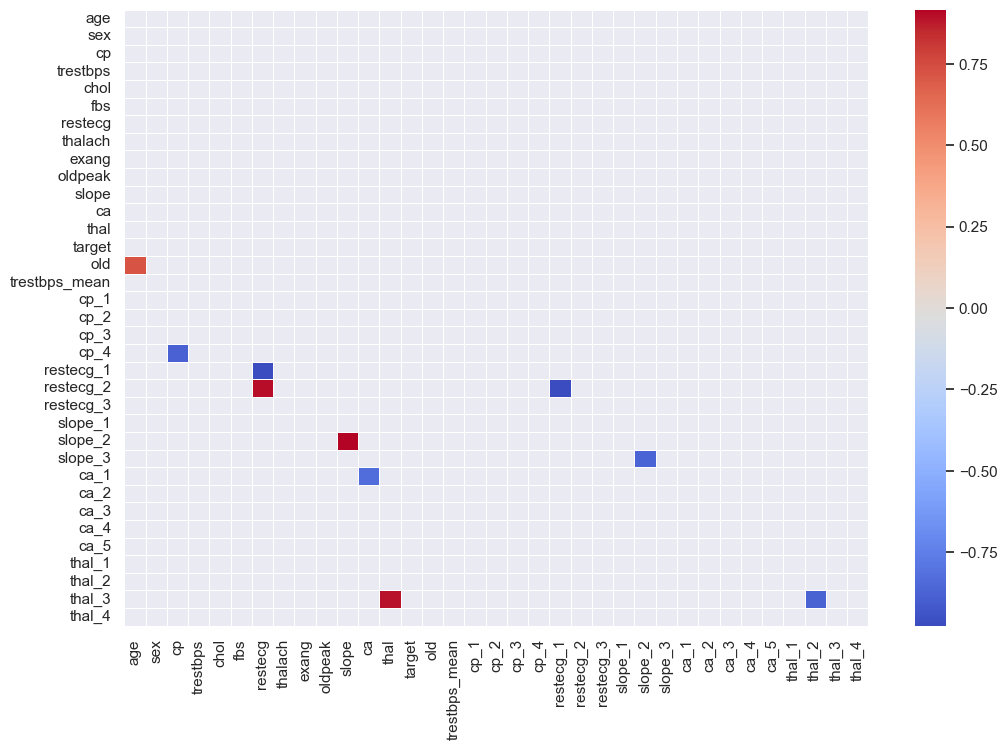

In [93]:
matrix = np.triu(heart_r.corr())
ax = plt.subplots(figsize=(12, 8))
corr_df = heart.corr()
ax = sns.heatmap(corr_df[abs(corr_df) >= 0.7], mask=matrix, linewidths=0.4, cmap="coolwarm")
ax;